<a href="https://colab.research.google.com/github/Monish-Kumar-D/single_feature_model/blob/main/Stock_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import copy
import math

In [2]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
data = df.drop(columns=['Date','Volume','Close'])
data.describe()

,Open,High,Low,Adj Close
count,2416.000000,2416.000000,2416.000000,2416.000000
mean,186.271147,189.578224,182.916639,186.403651
std,118.740163,120.892329,116.857591,119.136020
min,16.139999,16.629999,14.980000,15.800000
25%,34.342498,34.897501,33.587501,34.400002
50%,213.035004,216.745002,208.870002,212.960007
75%,266.450012,270.927513,262.102501,266.774994
max,673.690002,786.140015,673.520020,780.000000


In [4]:
X = data.drop(columns=['Adj Close'])
scaler = StandardScaler()
X= scaler.fit_transform(X)
q1,q2,q3 = X[:,0],X[:,1],X[:,2]
y = data['Adj Close']
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [5]:
def gradient_function(X,y,w,b):
    m = X.shape[0]
    X = X.astype(np.float64)
    y = y.astype(np.float64)
    w = w.astype(np.float64)
    b = np.float64(b)

    predictions = np.dot(X, w) + b
    errors = predictions - y

    djdw = (1 / m) * np.dot(X.T, errors)
    djdb = (1 / m) * np.sum(errors)

    return djdw, djdb

In [6]:
def cost_function(X,y,w,b):
    m = X.shape[0]
    X = X.astype(np.float64)
    y = y.astype(np.float64)
    w = w.astype(np.float64)
    b = np.float64(b)

    predictions = np.dot(X, w) + b
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)

    return cost


In [7]:
def gradient_decent(X,y,w_in,b_in,alpha):
    J_history = []
    w_history = []

    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(1000):
        djdw, djdb = gradient_function(X, y, w, b)

        w = w - alpha * djdw
        b = b - alpha * djdb

        if i < 1000:
            cost = cost_function(X, y, w, b)
            J_history.append(cost)

            if i % math.ceil(1000 / 10) == 0:
                w_history.append(w)
                print(f"Iteration {i}: Cost {cost}")

    return w, b, J_history, w_history

Iteration 0: Cost 23847.877127530744
Iteration 100: Cost 2291.7205149921056
Iteration 200: Cost 310.50998900531465
Iteration 300: Cost 47.11095208328173
Iteration 400: Cost 11.81481058361626
Iteration 500: Cost 7.081699253777571
Iteration 600: Cost 6.444307876021023
Iteration 700: Cost 6.355783431421493
Iteration 800: Cost 6.340814845526305
Iteration 900: Cost 6.3357060375386425
[39.1733893  39.94458391 39.89551704] 186.40892141064134
98.55371900826447


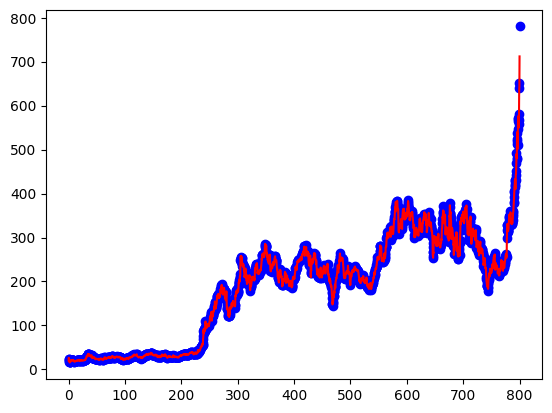

In [8]:
w = np.zeros(X_train.shape[1])
b = 0
alpha = 0.01
w,b,_,_ = gradient_decent(X_train,y_train,w,b,alpha)
print(w,b)
func = lambda x: np.dot(x,w)+b
prediction = func(x_test)
threshold = 5
percentage_differences = (prediction - y_test) / y_test * 100
correct_predictions = np.where(np.abs(percentage_differences) <= threshold, 1, 0)
accuracy = (np.sum(correct_predictions) / len(y_test)) * 100
print(accuracy)

m = X.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = np.dot(w,X[i].T) + b
a = a = np.linspace(0,800,2416)
plt.scatter(a, y, color='blue', label='Feature 1')
plt.plot(a, predicted, color='red', label='Regression Line')

# Using scikit-learn library

In [9]:
model = LinearRegression()
f = model.fit(X_train,y_train)

93.59504132231406


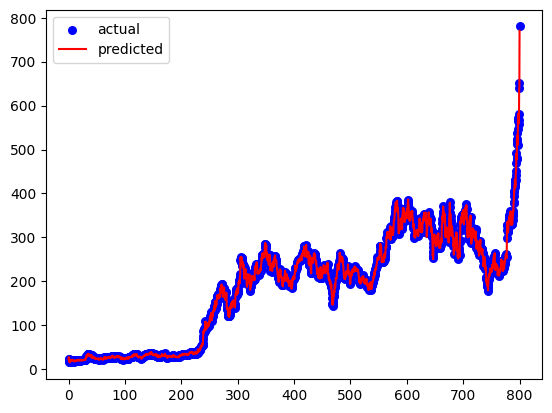

In [10]:
prediction = f.predict(x_test)
score = mean_squared_error(y_test,prediction)
threshold = 2
percentage_differences = (prediction - y_test) / y_test * 100
correct_predictions = np.where(np.abs(percentage_differences) <= threshold, 1, 0)
accuracy = (np.sum(correct_predictions) / len(y_test)) * 100
print(accuracy)
p = f.predict(X)

a = np.linspace(0,800,2416)
plt.scatter(a, y, color='blue', label='actual',s=30, marker='o')
plt.plot(a,p,'red',label="predicted")
plt.legend()
plt.show()

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB
None
Train RMSE: 2.0

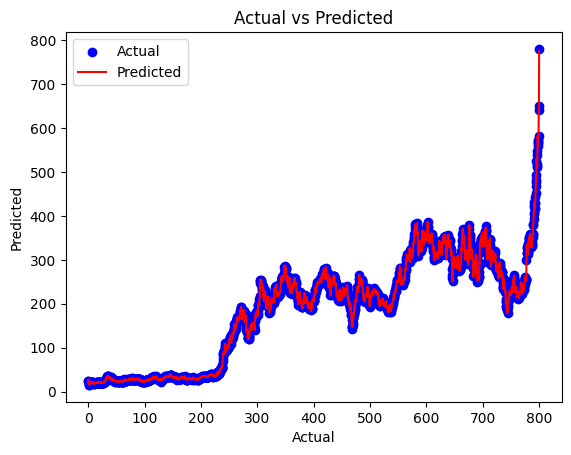

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the Dataset
data = pd.read_csv("TSLA.csv")

# Step 2: Explore the Data
print(data.head())  # View the first few rows of the dataset
print(data.info())  # Check the data types and missing values

# Step 3: Prepare the Data
# Assuming 'Close' is the target variable, and other columns are features
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target variable

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
train_predictions = model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
print("Train RMSE:", train_rmse)

test_predictions = model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
print("Test RMSE:", test_rmse)

# Step 7: Make Predictions (if needed)
# You can use the trained model to make predictions on new data if needed.
predictions = model.predict(X)

# Compute RMSE
rmse = mean_squared_error(y, predictions, squared=False)
print("RMSE:", rmse)

# Compute R-squared
r2 = r2_score(y, predictions)
print("R-squared:", r2)

a = a = np.linspace(0,800,2416)
# Plot predicted vs actual values
plt.scatter(a,y, color='blue', label='Actual')  # Actual values in blue
plt.plot(a, predictions, color='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
